In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
file_path = './json_data/'
file_names = ['australian_user_reviews', 'australian_users_items', 'bundle_data', 'steam_games']

### Fix json file

In [3]:
def eval_and_redump(text):
    file = open(file_path+text+'.json','r')
    write = open(file_path+text+'_fixed.json','w')
    array = []
    for line in file:
        line_dict = eval(line)
        array.append(line_dict)
    json.dump(array,write)
    return None

In [4]:
# for name in file_names:
#     eval_and_redump(name)

In [5]:
df_dict = {}
for name in file_names:
    df_dict[name] = pd.read_json(file_path+name+'_fixed.json')
#     df_dict[name].to_csv(file_path+name+'.csv', index = False)

In [6]:
user_reviews = df_dict['australian_user_reviews']
user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [7]:
user_items = df_dict['australian_users_items']
user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066624,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700688,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759264,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [8]:
user_has_items = user_items[user_items.items_count>0]

In [9]:
user_has_items.items_count.describe()

count    71504.000000
mean        72.068821
std        132.242355
min          1.000000
25%         14.000000
50%         40.000000
75%         88.000000
max       7762.000000
Name: items_count, dtype: float64

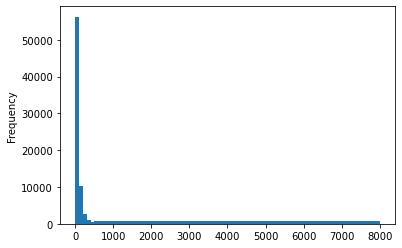

In [10]:
user_has_items.items_count.plot(kind='hist', bins=[0,100,8000])

In [12]:
with open(file_path+'australian_users_items'+'_fixed.json') as f:
    df_items = json.load(f)   
user_items_df = pd.json_normalize(data=df_items, 
                              record_path='items',
                              meta=['items_count','steam_id','user_id','user_url'])

In [13]:
user_items_df

,item_id,item_name,playtime_forever,playtime_2weeks,items_count,steam_id,user_id,user_url
0,10,Counter-Strike,6,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [14]:
user_items_df.to_csv("user_item.csv", index=False)

In [15]:
pd.read_csv("user_item.csv")

,item_id,item_name,playtime_forever,playtime_2weeks,items_count,steam_id,user_id,user_url
0,10,Counter-Strike,6,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,7,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [16]:
games = df_dict['steam_games']

In [17]:
games = games.drop_duplicates(["id"])

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32133 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24081 non-null  object 
 1   genres          28850 non-null  object 
 2   app_name        32131 non-null  object 
 3   title           30083 non-null  object 
 4   url             32133 non-null  object 
 5   release_date    30066 non-null  object 
 6   tags            31970 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32132 non-null  object 
 9   specs           31463 non-null  object 
 10  price           30756 non-null  object 
 11  early_access    32133 non-null  bool   
 12  id              32132 non-null  float64
 13  developer       28834 non-null  object 
 14  sentiment       24951 non-null  object 
 15  metascore       2675 non-null   object 
dtypes: bool(1), float64(2), object(13)
memory usage: 4.0+ MB


In [19]:
games

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640.0,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530.0,Sacada,NaN,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660.0,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870.0,"xropi,stev3ns",1 user reviews,NaN


In [20]:
games.price.unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, nan, 'Free', 10.99, 1.5899999999999999, 14.99, 1.99,
       59.99, 8.99, 6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 9.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 10.49, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0,
       20.0, 40.0, 3.33, 199.99, 22.99, 320.0, 38.85, 71.7, 59.95, 995.0,
       27.49, 

In [21]:
free_or_demo = games['price'].astype(str).str.contains("Free|free|Demo|demo")

In [28]:
games.loc[free_or_demo, 'price'] = 0

In [23]:
games.loc[:,'price'] = pd.to_numeric(games.price, errors='coerce') 

In [30]:
games.shape

(32133, 16)

In [35]:
games = games.dropna(subset=["id"])

In [36]:
games.shape

(32132, 16)

In [38]:
games.id = games.id.astype(int)

In [39]:
games.to_csv("games.csv", index=False)

In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32132 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24081 non-null  object 
 1   genres          28850 non-null  object 
 2   app_name        32131 non-null  object 
 3   title           30083 non-null  object 
 4   url             32132 non-null  object 
 5   release_date    30066 non-null  object 
 6   tags            31970 non-null  object 
 7   discount_price  224 non-null    float64
 8   reviews_url     32132 non-null  object 
 9   specs           31463 non-null  object 
 10  price           30747 non-null  float64
 11  early_access    32132 non-null  bool   
 12  id              32132 non-null  int64  
 13  developer       28834 non-null  object 
 14  sentiment       24951 non-null  object 
 15  metascore       2675 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 4.0+ MB
